In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

        
# !pip3 install -U lazypredict
# !pip3 install -U pandas #Upgrading pandas

/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv


# **Getting data**

In [2]:
data=pd.read_csv('/kaggle/input/spaceship-titanic/train.csv')
test=pd.read_csv('/kaggle/input/spaceship-titanic/test.csv')


# **Exploring Data**

In [3]:
data.head(10)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
5,0005_01,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True
6,0006_01,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,True
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,True
8,0007_01,Earth,False,F/3/S,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,216.0,0.0,Andona Beston,True
9,0008_01,Europa,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic,True


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [5]:
data.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


As you can see we have **6 numeric** features and **5 categorical** features(and aslo PassengerId, Name, and our target **Transported**).

<AxesSubplot:xlabel='CryoSleep', ylabel='count'>

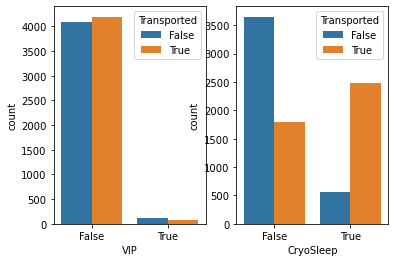

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, axs = plt.subplots(ncols=2)


sns.countplot(data=data, x="VIP", hue="Transported",ax=axs[0])
sns.countplot(data=data, x="CryoSleep", hue="Transported",ax=axs[1])

In [7]:
pd.pivot_table(data, index="Transported", values = 'PassengerId', columns='VIP', aggfunc ='count')

VIP,False,True
Transported,,
False,4093,123
True,4198,76


**We can see that passengers with vip has worst stat in Transported feature, at the same time passengers with cryosleep have positive stat in this parameter. So we can understand that Cryosleep affect positively on chance of transportation.**

<AxesSubplot:xlabel='Destination', ylabel='count'>

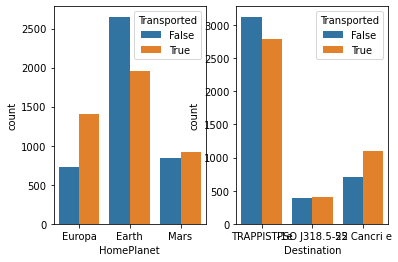

In [8]:
fig, axs = plt.subplots(ncols=2)
sns.countplot(data=data, x="HomePlanet", hue="Transported",ax=axs[0])
sns.countplot(data=data, x="Destination", hue="Transported",ax=axs[1])


**Lets explore "Cabin" feature**

In [9]:
df=pd.DataFrame()
df[['Cabin_deck','Cabin_num','Cabin_side']]=data.dropna().Cabin.str.split('/',expand=True)
df=df.astype({'Cabin_num':'int'})
df.head(10)

,Cabin_deck,Cabin_num,Cabin_side
0,B,0,P
1,F,0,S
2,A,0,S
3,A,0,S
4,F,1,S
5,F,0,P
6,F,2,S
8,F,3,S
9,B,1,P
11,B,1,P


In [10]:
print(df['Cabin_deck'].value_counts())
print(df['Cabin_side'].value_counts())
df['Cabin_num'].describe()

F    2152
G    1973
E     683
B     628
C     587
D     374
A     207
T       2
Name: Cabin_deck, dtype: int64
S    3345
P    3261
Name: Cabin_side, dtype: int64


count    6606.000000
mean      599.177414
std       513.450585
min         0.000000
25%       166.000000
50%       424.000000
75%       994.000000
max      1894.000000
Name: Cabin_num, dtype: float64

In [11]:
import plotly.express as px
px.histogram(data, x="Age",color='Transported',  marginal='box')

In [12]:
px.histogram(data[data['RoomService']>50][data['RoomService']<5000], x="RoomService",color='Transported')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



**Most passengers didn't spend money on service**

In [13]:
px.histogram(data[data['RoomService']<50], x="RoomService",color='Transported')

**For FoodCourt,ShoppingMall,Spa,VRDeck plot is so similar. So i'm going to unite all this feature in one. Which will represent of total amount of money spent on board.**

# **Missing values**

In [14]:
data.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

**Most of the missing values im going to replace by median(for numeric) or mode(for categorical). For binary cat. features such as VIP or CryoSleep ill use False, what means lack of VIP or CryoSleep**

In [15]:
data[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']] = data[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']].fillna(0)
data['VIP']=data['VIP'].fillna(False)
data['Age']=data['Age'].fillna(data['Age'].median())
data['Destination']=data['Destination'].fillna(data['Destination'].mode()[0])
data['Cabin'] =data['Cabin'].fillna('T/0/S')
data['CryoSleep']=data['CryoSleep'].fillna(False)
data['HomePlanet']=data['HomePlanet'].fillna(data['HomePlanet'].mode()[0])
data.set_index('PassengerId',inplace=True)

test
test[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']] = test[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']].fillna(0)
test['VIP']=test['VIP'].fillna(False)
test['Age']=test['Age'].fillna(test['Age'].median())
test['Destination']=test['Destination'].fillna(test['Destination'].mode()[0])
test['Cabin'] =test['Cabin'].fillna('T/0/S')
test['CryoSleep']=test['CryoSleep'].fillna(False)
test['HomePlanet']=test['HomePlanet'].fillna(test['HomePlanet'].mode()[0])
test.set_index('PassengerId',inplace=True)

In [16]:
data.isna().sum()

HomePlanet        0
CryoSleep         0
Cabin             0
Destination       0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name            200
Transported       0
dtype: int64

In [17]:
test.isna().sum()

HomePlanet       0
CryoSleep        0
Cabin            0
Destination      0
Age              0
VIP              0
RoomService      0
FoodCourt        0
ShoppingMall     0
Spa              0
VRDeck           0
Name            94
dtype: int64

**Actually, we dont need names in our prediction. So i going to drop it.**

In [18]:
data.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
PassengerId,,,,,,,,,,,,,
0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [19]:
test.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
PassengerId,,,,,,,,,,,,
0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


# **Feature engineering**

1. Here i'll split Cabin feature into 3 different features, which represents Cabin deck, number of room, and side of the room on the deck.
2. I'm going to transform Age feature to the 4 categories (0-20,21-40,41-60,61-80) to represent age category, cause I don't think we need an exact number. 
3. Making sum of the service features.

In [20]:

data[['Cabin_deck','Cabin_num','Cabin_side']]=data.Cabin.str.split('/',expand=True)
data['Total_spend']=data['RoomService']+data['FoodCourt']+data['ShoppingMall']+data['Spa']+data['VRDeck']
data=data.drop(['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck','Cabin','Name'],axis=1)

# ------------------------------------------------------

test[['Cabin_deck','Cabin_num','Cabin_side']]=test.Cabin.str.split('/',expand=True)
test['Total_spend']=test['RoomService']+test['FoodCourt']+test['ShoppingMall']+test['Spa']+test['VRDeck']
test=test.drop(['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck','Cabin','Name'],axis=1)



Transforming categorical data into numeric by Binarizing or OneHot 

In [21]:
from sklearn.preprocessing import LabelEncoder

data[['CryoSleep','VIP','Transported','Cabin_side']]=data[['CryoSleep','VIP','Transported','Cabin_side']].apply(LabelEncoder().fit_transform)
OHE=pd.get_dummies(data[['HomePlanet','Destination','Cabin_deck']])
data_y=data['Transported']
data=pd.concat([data, OHE], axis=1).drop(['HomePlanet','Destination','Cabin_deck','Transported'],axis=1)
data=data.drop('Cabin_num', axis=1)
data2=data.copy()
for i in range(4):
    data2.loc[(data2.Age >= 20*i) & (data2.Age < 20*(i+1)), 'AgeGroup'] = i
data2=data2.drop('Age', axis=1)
data3=pd.get_dummies(data2,columns=['AgeGroup'])



# ----------------------------------------------------------------------------


test[['CryoSleep','VIP','Cabin_side']]=test[['CryoSleep','VIP','Cabin_side']].apply(LabelEncoder().fit_transform)
OHE=pd.get_dummies(test[['HomePlanet','Destination','Cabin_deck']])
test=pd.concat([test, OHE], axis=1).drop(['HomePlanet','Destination','Cabin_deck'],axis=1)
test=test.drop('Cabin_num', axis=1)
test2=test.copy()
for i in range(4):
    test2.loc[(test2.Age >= 20*i) & (test2.Age < 20*(i+1)), 'AgeGroup'] = i
test2=test2.drop('Age', axis=1)
test3=pd.get_dummies(test2,columns=['AgeGroup'])


I created 3 different interpretation of age in dataset. First, age is a number. Second as a AgeGroup(20 years each) from 1-5. Third AgeGroup but OneHotEncoded.
Second performed the best in modeling.

In [22]:
data2.dtypes

CryoSleep                      int64
VIP                            int64
Cabin_side                     int64
Total_spend                  float64
HomePlanet_Earth               uint8
HomePlanet_Europa              uint8
HomePlanet_Mars                uint8
Destination_55 Cancri e        uint8
Destination_PSO J318.5-22      uint8
Destination_TRAPPIST-1e        uint8
Cabin_deck_A                   uint8
Cabin_deck_B                   uint8
Cabin_deck_C                   uint8
Cabin_deck_D                   uint8
Cabin_deck_E                   uint8
Cabin_deck_F                   uint8
Cabin_deck_G                   uint8
Cabin_deck_T                   uint8
AgeGroup                     float64
dtype: object

In [23]:
data2.head()

,CryoSleep,VIP,Cabin_side,Total_spend,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Cabin_deck_A,Cabin_deck_B,Cabin_deck_C,Cabin_deck_D,Cabin_deck_E,Cabin_deck_F,Cabin_deck_G,Cabin_deck_T,AgeGroup
PassengerId,,,,,,,,,,,,,,,,,,,
0001_01,0,0,0,0.0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1.0
0002_01,0,0,1,736.0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1.0
0003_01,0,1,1,10383.0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,2.0
0003_02,0,0,1,5176.0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1.0
0004_01,0,0,1,1091.0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0.0


# **Models**

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(data2, data_y, test_size=0.2,random_state=13)

In [25]:
!pip3 install -U lazypredict
from lazypredict.Supervised import LazyClassifier
clf = LazyClassifier(verbose=0,ignore_warnings=True,custom_metric=None, predictions=False)

models, predictions = clf.fit(X_train, X_val, y_train, y_val)
models

100%|██████████| 29/29 [00:22<00:00,  1.29it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,0.75,0.75,0.75,0.75,0.20
XGBClassifier,0.75,0.75,0.75,0.75,0.86
SVC,0.74,0.74,0.74,0.74,2.81
NuSVC,0.74,0.74,0.74,0.74,4.09
AdaBoostClassifier,0.74,0.74,0.74,0.74,0.33
RidgeClassifier,0.73,0.73,0.73,0.73,0.04
LinearDiscriminantAnalysis,0.73,0.73,0.73,0.73,0.13
RidgeClassifierCV,0.73,0.73,0.73,0.73,0.08
LinearSVC,0.72,0.72,0.72,0.72,0.89


So, I'm going to use SVC, XGBClassifier, LGBMClassifier, RandomForestClassifier and Neural Network.
You can see below grid search, training and validation score.

In [26]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier

In [27]:
# xgbc = XGBClassifier()

# xgbc_params = {
#         "gamma": [1, 1.5, 2],
#         "subsample": [0.75, 1.0, 1.25],
#         "colsample_bytree": [0.25,0.5, 0.75],
#         "max_depth": [3, 4, 5],
#         "n_estimators": [100, 125, 150]
# }
# xgbc_cv_model = GridSearchCV(xgbc, xgbc_params, cv = 5, n_jobs = -1)
# xgbc_cv_model.fit(X_train, y_train)
# print("Best hyperparametres of the model: \n", xgbc_cv_model.best_params_)
# # (gamma = 1.5, subsample = 1.0, max_depth = 5, colsample_bytree = 0.5,n_estimators = 125)

In [28]:
xgbc = XGBClassifier(gamma = 1.5, subsample = 1.0, max_depth = 5, colsample_bytree = 0.5,n_estimators = 125)
xgbc = xgbc.fit(X_train, y_train)
from sklearn.metrics import accuracy_score
y_pred = xgbc.predict(X_val)
print('Accuracy score',accuracy_score(y_val, y_pred))

Accuracy score 0.745830937320299


In [29]:
# parameters = {'C':(1,3,5,7,9),'gamma':(0.1, 1, 10)}
# clf = GridSearchCV(SVC(), parameters,cv=5)
# clf.fit(X_train,y_train)
# clf.best_params_
# # {'C': 1, 'gamma': 0.1}

In [30]:
SVC=SVC(C=5,gamma=0.1)
SVC.fit(X_train, y_train)
y_pred = SVC.predict(X_val)
print('Accuracy score',accuracy_score(y_val, y_pred))

Accuracy score 0.730879815986199


In [31]:
# from lightgbm import LGBMClassifier
# lgb_params = {
    
#     'n_estimators' :[50,100,125],
#     'learning_rate' : [0.03,0.05,0.08],
#      'max_depth' : [4,5,6]
# }
# gbc_cv_model = GridSearchCV(LGBMClassifier(objective='binary'), lgb_params, cv = 5, n_jobs = -1)
# gbc_cv_model.fit(X_train, y_train)
# print("Best hyperparametres of the model: \n", gbc_cv_model.best_params_)
# Best hyperparametres of the model: 
#  {'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 125}

In [32]:
LGBM=LGBMClassifier(objective='binary',learning_rate= 0.08, max_depth=4, n_estimators=100)
LGBM.fit(X_train, y_train)
y_pred=LGBM.predict(X_val)
print('Accuracy score',accuracy_score(y_val, y_pred))

Accuracy score 0.753306497987349


In [33]:
# from sklearn.ensemble import RandomForestClassifier
# rfc_params = {'bootstrap': [True, False],
#  'max_depth': [5,6,7,8,9,10],
#  'max_features': ['auto', 'sqrt'],
#  'min_samples_leaf': [1, 2, 4],
#  'min_samples_split': [2, 5, 10],
#  'n_estimators': [100,125,150]}

# gbc_cv_model = GridSearchCV(RandomForestClassifier(), rfc_params, cv = 5, n_jobs = -1)
# gbc_cv_model.fit(X_train, y_train)
# print("Best hyperparametres of the model: \n", gbc_cv_model.best_params_)

# bootstrap=True, max_depth=10, max_features='sqrt', min_samples_leaf=2, min_samples_split=5, n_estimators=150

In [34]:
RFC=RandomForestClassifier(bootstrap=True, max_depth=10, max_features='sqrt', min_samples_leaf=2, min_samples_split=5, n_estimators=150)
RFC.fit(X_train, y_train)
y_pred=RFC.predict(X_val)
print('Accuracy score',accuracy_score(y_val, y_pred))

Accuracy score 0.7452558941920644


In [35]:
import tensorflow.keras as tf
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

nn=tf.Sequential()
nn.add(tf.layers.Dense(256,activation='relu',input_shape=(X_train.shape[1],)))
nn.add(tf.layers.Dense(256,activation='relu'))
nn.add(tf.layers.Dense(1,activation='sigmoid'))

nn.compile(optimizer=tf.optimizers.Adam(learning_rate=0.001),loss='BinaryCrossentropy',metrics=['accuracy'])
nn.summary()
History=nn.fit(X_train,y_train,batch_size=32,epochs=50,validation_split=.3)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               5120      
_________________________________________________________________
dense_1 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 71,169
Trainable params: 71,169
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
153/153 [==============================] - 2s 5ms/step - loss: 16.9891 - accuracy: 0.6597 - val_loss: 30.7485 - val_accuracy: 0.7451
Epoch 2/50
153/153 [==============================] - 1s 4ms/step - loss: 13.7639 - accuracy: 0.6791 - val_loss: 1.4431 - val_accuracy: 0.7494
Epoch 3/50
153/153 [==============================] - 1s 4ms/step - loss: 11.4682 - accuracy: 0

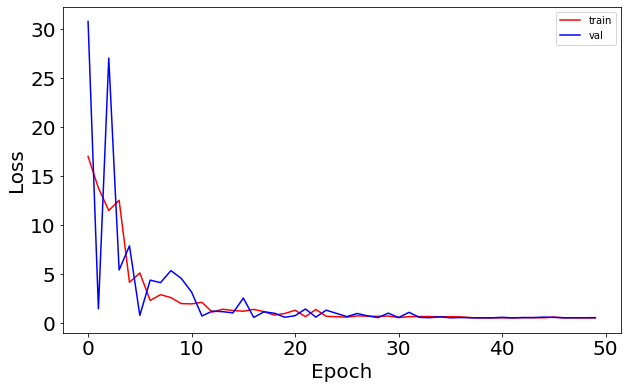

In [36]:
fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(History.history['loss'], 'r', label='train')
ax.plot(History.history['val_loss'], 'b' ,label='val')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'Loss', fontsize=20)
ax.legend()
ax.tick_params(labelsize=20)
#,callbacks=[early_stopping]

In [37]:
y_pred=nn.predict(X_val)
y_pred=(y_pred >= 0.5).astype(int)
print('Accuracy score',accuracy_score(y_val, y_pred))

Accuracy score 0.7389304197814837


In [38]:
submission=pd.read_csv('/kaggle/input/spaceship-titanic/sample_submission.csv')
y_pred=nn.predict(test2)
y_pred=(y_pred >= 0.5).astype(int)
submission['Transported'] = y_pred.astype("bool")
submission.to_csv("submission.csv",index=False)
submission.head()

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,False
4,0023_01,False
